In [62]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ROOT = Path.cwd().resolve().parent
DATA = ROOT / "Data" / "December1999.txt"

In [3]:
df = pd.read_csv(DATA, sep='\t')
print(df.head())

  vru+line  call_id  customer_id  priority type    date vru_entry vru_exit  \
0   AA0101    49296          0.0         0   PS  991201   5:20:04  5:20:41   
1   AA0101    49297   67472894.0         2   PS  991201   7:22:53  7:22:58   
2   AA0101    49298   56165871.0         2   PS  991201   7:44:58  7:45:04   
3   AA0101    49299          0.0         0   PS  991201   8:06:40  8:06:48   
4   AA0101    49300   42791442.0         2   PS  991201   8:24:13  8:24:19   

   vru_time  q_start   q_exit  q_time outcome ser_start ser_exit  ser_time  \
0        37  0:00:00  0:00:00       0    HANG   0:00:00  0:00:00         0   
1         5  7:22:58  7:24:18      80   AGENT   7:24:17  7:30:09       352   
2         6  7:45:04  7:48:22     198   AGENT   7:48:21  7:49:16        55   
3         8  0:00:00  0:00:00       0   AGENT   8:06:47  8:09:25       158   
4         6  8:24:19  8:25:00      41   AGENT   8:25:00  8:28:01       181   

      server  
0  NO_SERVER  
1     ZOHARI  
2     GELBER  
3 

Como queremos simular una M/M/S necesitamos datos en donde hubo un servicio, por lo que los apartados NO_SERVER no nos sirven

In [4]:
df = df[df['server'] != 'NO_SERVER']

También queremos los servicios donde el servicio fue el mismo, es decir queremos que vru+line sea el mismo para nuestros datos.

In [5]:
df[['vru+line']].value_counts()

vru+line
AA0216      1556
AA0116      1514
AA0201      1414
AA0207      1404
AA0213      1371
AA0208      1369
AA0214      1364
AA0109      1351
AA0203      1345
AA0103      1338
AA0206      1336
AA0104      1332
AA0115      1329
AA0209      1326
AA0210      1319
AA0106      1303
AA0110      1301
AA0113      1298
AA0101      1290
AA0215      1252
AA0202      1246
AA0204      1228
AA0105      1226
AA0205      1161
AA0102       842
AA0111       327
AA0107       319
AA0108       293
Name: count, dtype: int64

Agarraremos el servicio AA0216 porque es donde más datos hay

In [6]:
df = df[ df['vru+line'] == 'AA0216']
df

,vru+line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
40996,AA0216,15147,0.0,0,IN,991201,7:01:36,7:01:49,13,0:00:00,0:00:00,0,AGENT,7:01:48,7:08:31,403,Z2ARIE
40997,AA0216,15148,0.0,0,IN,991201,7:53:58,7:54:10,12,0:00:00,0:00:00,0,AGENT,7:54:09,7:56:44,155,Z2ARIE
40998,AA0216,15149,0.0,0,IN,991201,8:37:42,8:37:57,15,0:00:00,0:00:00,0,AGENT,8:37:56,8:39:01,65,Z2ARIE
40999,AA0216,15150,0.0,0,IN,991201,9:14:04,9:14:13,9,9:14:13,9:14:38,25,AGENT,9:14:37,9:21:18,401,Z2ARIE
41002,AA0216,15153,0.0,0,IN,991201,9:23:24,9:23:36,12,0:00:00,0:00:00,0,AGENT,9:23:35,9:26:15,160,Z2ARIE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43055,AA0216,17206,0.0,0,IN,991231,11:40:37,11:40:46,9,11:40:46,11:41:44,58,AGENT,11:41:43,11:51:52,609,Z2ARIE
43056,AA0216,17207,0.0,0,IN,991231,12:37:47,12:38:04,17,0:00:00,0:00:00,0,AGENT,12:38:03,12:41:07,184,Z2ARIE
43057,AA0216,17208,0.0,0,IN,991231,12:59:03,12:59:19,16,0:00:00,0:00:00,0,AGENT,12:59:18,13:05:47,389,Z2ARIE
43058,AA0216,17209,0.0,0,IN,991231,13:18:00,13:18:14,14,0:00:00,0:00:00,0,AGENT,13:18:13,13:18:30,17,Z2ARIE


In [7]:
df['server'].value_counts()

server
Z2EYAL       299
Z2NIRIT      292
Z2ARIE       260
Z2OFERZ      179
Z2ELINOR     169
Z2SPIEGEL    154
Z2ASSAF       84
Z2LIOR        57
GELBER        26
KAZAV         21
DORIT         11
ROTH           1
SHARON         1
ZIPI           1
AVI            1
Name: count, dtype: int64

In [44]:
servidores_por_fecha = df.groupby(['date'])['server'].unique()

In [57]:
servidores_por_fecha

date
991201       [Z2ARIE, Z2SPIEGEL, Z2NIRIT, Z2ELINOR, Z2EYAL]
991202    [Z2OFERZ, Z2LIOR, Z2EYAL, Z2ARIE, Z2NIRIT, GEL...
991203                          [Z2LIOR, Z2ELINOR, Z2OFERZ]
991204                                   [Z2EYAL, Z2ELINOR]
991205    [Z2ARIE, ROTH, Z2LIOR, Z2EYAL, Z2OFERZ, Z2NIRI...
991206    [Z2ARIE, Z2SPIEGEL, Z2ELINOR, Z2EYAL, Z2OFERZ,...
991207          [Z2SPIEGEL, Z2EYAL, DORIT, Z2NIRIT, Z2ARIE]
991208       [Z2SPIEGEL, Z2NIRIT, Z2ARIE, Z2ELINOR, GELBER]
991209                    [Z2ARIE, Z2LIOR, Z2NIRIT, Z2EYAL]
991210                             [Z2ARIE, Z2EYAL, Z2LIOR]
991211                                   [Z2NIRIT, Z2OFERZ]
991212                   [Z2NIRIT, Z2ARIE, Z2EYAL, Z2OFERZ]
991213        [Z2SPIEGEL, Z2ARIE, GELBER, Z2ELINOR, Z2EYAL]
991214                         [Z2SPIEGEL, Z2ARIE, Z2NIRIT]
991215               [Z2SPIEGEL, Z2NIRIT, Z2ARIE, Z2ELINOR]
991216                   [Z2ARIE, Z2OFERZ, Z2NIRIT, Z2LIOR]
991217                          [Z2

In [64]:
servers_dia = []
for i in range(31):
    size = len(servidores_por_fecha.iloc[i])
    servers_dia.append(size)

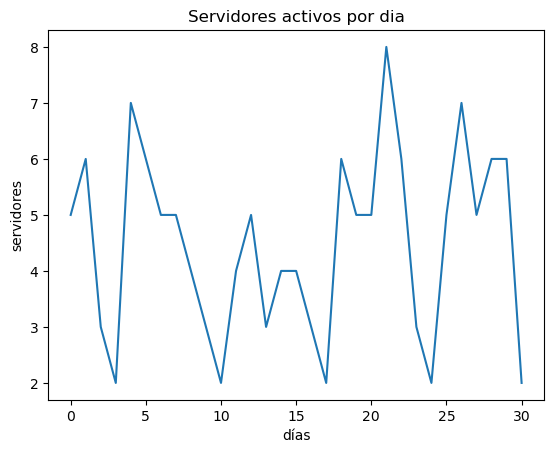

In [66]:
plt.plot(range(31), servers_dia)
plt.title('Servidores activos por dia')
plt.xlabel('días')
plt.ylabel('servidores')
plt.show()